In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

#### Read csv files 

In [102]:
covid19 = pd.read_csv("../../../data/output/covid.csv")
hospital= pd.read_csv("../../../data/output/COVID19_HOSBEDS_MERGE.CSV")
employment = pd.read_csv("../../../data/output/COVID19_EMPLOYMENT_MERGE.CSV")

#### Michigan State is chosen for the analysis 

In [103]:
covid19 = covid19.drop(covid19.loc[covid19['County Name'] == "Statewide Unallocated"].index)
MI_counties =covid19.loc[covid19['State'] == 'MI']
MI_state = MI_counties.groupby(['State']).sum()
MI_counties_cases = covid19.loc[:, covid19.columns.str.endswith("_x")]

#### These next sections get the normalized daily new cases and deaths in Michigan State 

In [104]:
MI_state_cases= MI_state.loc[:, MI_state.columns.str.endswith("_x")]
#select from the first day of infection 
MI_state_cases =MI_state_cases.loc[: ,'3/9/20_x':]
MI_new_cases= MI_state_cases.diff(axis=1)
MI_new_cases= MI_new_cases.drop(columns= ['3/9/20_x'], axis=1)
MI_new_cases.columns = MI_new_cases.columns.str.replace('_x', '')
MI_new_cases

normalized_daily_new_cases_MI= round(((MI_new_cases.div(9986857)).multiply(1_000_000)))
daily_mean_cases= normalized_daily_new_cases_MI.mean(axis=1)
print(daily_mean_cases)


State
MI    96.235772
dtype: float64


In [54]:
MI_state_deaths = MI_state.loc[:, MI_state.columns.str.endswith("_y")]
#select from the first day of infection 
MI_state_deaths =MI_state_deaths.loc[: ,'3/9/20_y':]
MI_new_deaths= MI_state_deaths.diff(axis=1)
MI_new_deaths= MI_new_deaths.drop(columns= ['3/9/20_y'], axis=1)
MI_new_deaths.columns = MI_new_deaths.columns.str.replace('_y', '')
MI_new_deaths


normalized_daily_new_deaths_MI= round(((MI_new_deaths.div(9986857)).multiply(20_000_000)))
daily_mean_deaths = normalized_daily_new_deaths_MI.mean(axis=1)
print(daily_mean_deaths)
normalized_daily_new_deaths_MI

State
MI    65.138211
dtype: float64


,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
State,,,,,,,,,,,,,,,,,,,,,
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,32.0,92.0,44.0,100.0,92.0,0.0,0.0,260.0,174.0


#### Fitting a linear model for MI state: store the days in X-axis and the number of cases/ deaths in Y-axis. To make the analysis easier, the days have been taking as integers(day1, day2...)

In [55]:
X_cases = MI_new_cases.columns.tolist()
X_cases = pd.to_datetime(X_cases) 
Y_cases = normalized_daily_new_cases_MI.iloc[0].values.tolist()
X = [i for i in range(MI_new_cases.columns.size)]

# next  seven days for prediction  
K = [i for i in range(MI_new_cases.columns.size ,MI_new_cases.columns.size + 7)]

#### Convert the data into 2D arrays as the linear model take 2Dimension data

In [56]:
Xcases_train = np.array(X)
Ycases_train = np.array(Y_cases)
K_test = np.array(K)

Xcases_train = Xcases_train[:, np.newaxis]
Ycases_train = Ycases_train[:, np.newaxis]
K_test = K_test[:, np.newaxis]

#### In this section,  a linear regression has been modelled. A prediction on the same data that was used to trained was made to see the performance of the model. Another prediction mas made for the next seven days. 

In [57]:
model = LinearRegression()
model.fit(Xcases_train, Ycases_train) #fit model 

y_hat1 = model.predict(Xcases_train)
y_hat = model.predict(K_test)
print("The mean of predicted cases: ", y_hat.mean())

The mean of predicted cases:  190.2994840357393


In [58]:
print("The RMSE error :", np.sqrt(metrics.mean_squared_error(Ycases_train, y_hat1)))
print ("The R^2: ",r2_score(Ycases_train, y_hat1))

The RMSE error : 126.7554763584582
The R^2:  0.1478808174250721


Text(0.5, 1.0, 'Linear Regression MI-cases')

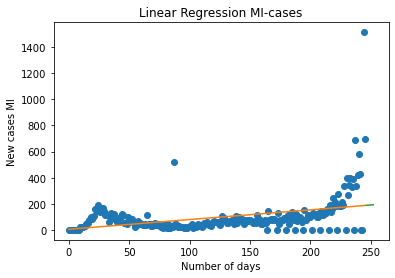

In [59]:
plt.figure()
plt.plot(Xcases_train.squeeze(), Ycases_train, 'o')
plt.plot(Xcases_train.squeeze(), y_hat1)
plt.plot(K_test,y_hat);
plt.xlabel('Number of days')
plt.ylabel('New cases MI')
plt.title('Linear Regression MI-cases')

#### The mean of daily new cases in Michigan was 96.23, that is to say there is an average of about 96 new cases each day and our model have predicted a mean of 190.  The performance of the linear model on this data is not very good. Probabily because a linear model does not best fit the data . Moreover we can see that through the R^2 measure which was only 0.14. 

#### Prediction for number of deaths in Michigan State

In [60]:
Y_deaths = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X_deaths_train = np.array(X)
Y_deaths_train = np.array(Y_deaths)
Kdeaths_test = np.array(K)

X_deaths_train = X_deaths_train[:, np.newaxis]
Y_deaths_train = Y_deaths_train[:, np.newaxis]
Kdeaths_test = Kdeaths_test[:, np.newaxis]

In [61]:
model = LinearRegression()
model.fit(X_deaths_train, Y_deaths_train) #fit model 

y_pred = model.predict(Kdeaths_test)
y_pred1 = model.predict(X_deaths_train)
print("The mean of predicted deaths: ", y_pred.mean())
y_pred

The mean of predicted deaths:  4.201891622650864


array([[5.64702174],
       [5.1653117 ],
       [4.68360166],
       [4.20189162],
       [3.72018159],
       [3.23847155],
       [2.75676151]])

In [62]:
print("The RMSE error :", np.sqrt(metrics.mean_squared_error(Y_deaths_train, y_pred1)))
print ("The R^2: ",r2_score(Y_deaths_train, y_pred1))

The RMSE error : 85.8393442004361
The R^2:  0.13704645844299057


Text(0.5, 1.0, 'Linear Regression MI-deaths')

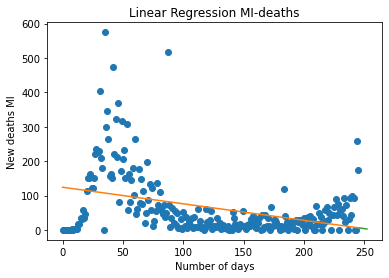

In [63]:
plt.figure()
plt.plot(X_deaths_train.squeeze(), Y_deaths_train, 'o')
plt.plot(X_deaths_train.squeeze(), y_pred1)
plt.plot(Kdeaths_test.squeeze(), y_pred);
plt.xlabel('Number of days')
plt.ylabel('New deaths MI')
plt.title('Linear Regression MI-deaths')

#### For the number of deaths, similar to number of cases, the linear model is not very accurate we would have expect around 30-50 deaths daily based on the average, it would have been acceptable. In addition, the R^2 metric was only 0.13, so the model is not a good model for this data.

### Non-Linear Regression Model 

#### Polynomial Model: Since they linear regression model did not work let's a non linear in this case a polynomial model and observe its performance.

Text(0.5, 1.0, 'Polynomial Regression MI-cases')

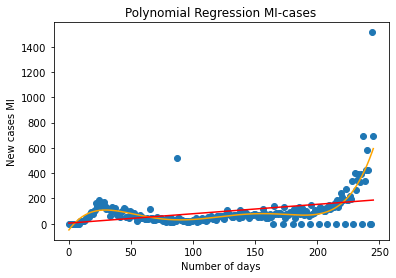

In [64]:
X_train= np.array(X)
Y_train= np.array(Y_cases)
X_train = X_train[:, np.newaxis]
Y_train= Y_train[:, np.newaxis]

poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(X_train) 

poly.fit(X_poly, Y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, Y_train) 

ycases_hat = lin2.predict(poly.fit_transform(X_train))

plt.scatter(X_train, Y_train) 
plt.plot(X_train, ycases_hat, color = 'orange')

#Trend line 
X = [i for i in range(MI_new_cases.columns.size)]
Y_cases = normalized_daily_new_cases_MI.iloc[0].values.tolist()
X = np.array(X)
Y = np.array(Y_cases)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)

plt.plot(X,p(X),"r-")

plt.xlabel('Number of days')
plt.ylabel('New cases MI')
plt.title('Polynomial Regression MI-cases')

In [65]:
print ("The RMSE error: ", np.sqrt(metrics.mean_squared_error(Ycases_train, lin2.predict(poly.fit_transform(X_train)))))
print ("The R^2: ",r2_score(Ycases_train, lin2.predict(poly.fit_transform(X_train))))

The RMSE error:  96.61547329881358
The R^2:  0.5049372498125628


Text(0.5, 1.0, 'Polynomial Regression MI-deaths')

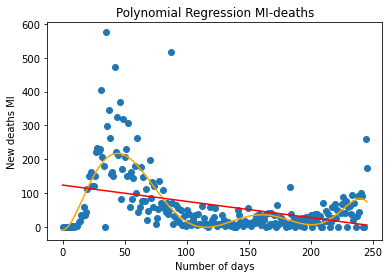

In [66]:
Y_deaths = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X_deaths_train = np.array(X)
Y_deaths_train = np.array(Y_deaths)
Kdeaths_test = np.array(K)

X_deaths_train = X_deaths_train[:, np.newaxis]
Y_deaths_train= Y_deaths_train[:, np.newaxis]
Kdeaths_test= Kdeaths_test[:, np.newaxis]


poly = PolynomialFeatures(degree = 7) 
X_poly = poly.fit_transform(X_train) 

poly.fit(X_poly, Y_deaths_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, Y_deaths_train) 

ycases_hat = lin2.predict(poly.fit_transform(Kdeaths_test))
ycases_hat1 = lin2.predict(poly.fit_transform(X_train))

plt.scatter(X_train, Y_deaths_train) 
plt.plot(X_train, ycases_hat1, color = 'orange')

X = [i for i in range(MI_new_cases.columns.size)]
Y_cases = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X = np.array(X)
Y = np.array(Y_cases)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)

plt.plot(X,p(X),"r-")

plt.xlabel('Number of days')
plt.ylabel('New deaths MI')
plt.title('Polynomial Regression MI-deaths')

In [67]:
print ("The RMSE error: ", np.sqrt(metrics.mean_squared_error(Y_deaths_train, lin2.predict(poly.fit_transform(X_train)))))
print ("The R^2: ",r2_score(Y_deaths_train, lin2.predict(poly.fit_transform(X_train))))

The RMSE error:  62.66449435856421
The R^2:  0.5401060326673048


#### The top 5 counties from stage 2 were: Wayne county, Oakland County,  Macomb County,  Genesee County and Kent County

In [68]:
MI_counties_cases= MI_counties.loc[:, MI_counties.columns.str.endswith("_x")]

#select from the first day of infection 
MI_counties_cases = MI_counties_cases.loc[: ,'3/9/20_x':]
MI_counties_new_cases= MI_counties_cases.diff(axis=1)
MI_counties_new_cases= MI_counties_new_cases.drop(columns= ['3/9/20_x'], axis=1)
MI_counties_new_cases.columns = MI_counties_new_cases.columns.str.replace('_x', '')
MI_counties_new_cases.head()

,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0
1256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,1.0,2.0,2.0,0.0,0.0,12.0,7.0
1257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.0,53.0,72.0,84.0,57.0,0.0,0.0,243.0,85.0
1258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,3.0,4.0,0.0,11.0,0.0,0.0,20.0,18.0
1259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,4.0,2.0,15.0,9.0,0.0,0.0,29.0,4.0


In [69]:
MI_counties_new_cases.columns = pd.to_datetime(MI_counties_new_cases.columns.tolist())
MI_counties_new_cases.head()

,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,...,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0
1256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,1.0,2.0,2.0,0.0,0.0,12.0,7.0
1257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.0,53.0,72.0,84.0,57.0,0.0,0.0,243.0,85.0
1258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,3.0,4.0,0.0,11.0,0.0,0.0,20.0,18.0
1259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,4.0,2.0,15.0,9.0,0.0,0.0,29.0,4.0


In [70]:
# convert date to int to facilitate fitting the model 
X_counties = [i for i in range(MI_counties_new_cases.columns.size)]
top5_counties = MI_counties_new_cases.loc[[1336, 1317, 1304,1295,1279]] 
top5_counties

,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,...,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10
1336,1.0,0.0,0.0,5.0,2.0,5.0,1.0,3.0,6.0,96.0,...,0.0,765.0,412.0,507.0,565.0,467.0,0.0,0.0,1625.0,850.0
1317,1.0,0.0,2.0,3.0,3.0,5.0,0.0,2.0,7.0,82.0,...,0.0,897.0,363.0,360.0,632.0,323.0,0.0,0.0,1705.0,704.0
1304,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,2.0,45.0,...,0.0,650.0,257.0,395.0,681.0,372.0,0.0,0.0,1413.0,788.0
1295,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,725.0,361.0,483.0,633.0,388.0,0.0,0.0,1432.0,912.0
1279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,238.0,122.0,196.0,195.0,135.0,0.0,0.0,593.0,167.0


In [71]:
for i in range (top5_counties.index.size):
    Y = top5_counties.iloc[i].values.tolist()
    X_train= np.array(X)
    Y_train= np.array(Y)
    X_train = X_train[:, np.newaxis]
    Y_train= Y_train[:, np.newaxis]

    model = LinearRegression()
    model.fit(X_train,Y_train)

    y_hat= model.predict(X_train)
    y_hat1= model.predict(K_test)
    
    #plt.figure()
    #plt.plot(X_train.squeeze(), Y_train, 'o')
    #plt.plot(X_train.squeeze(), y_hat);
    #plt.plot(K_test.squeeze(), y_hat1)

#### For the 5 top counties, a polynimal model fits the data better. 

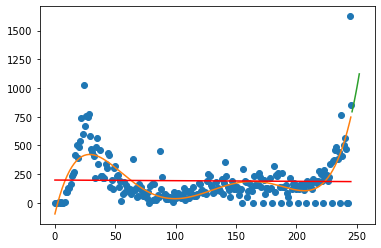

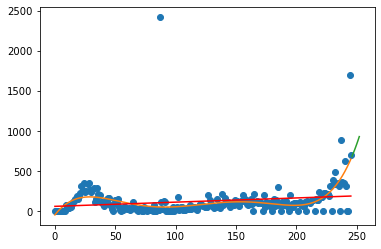

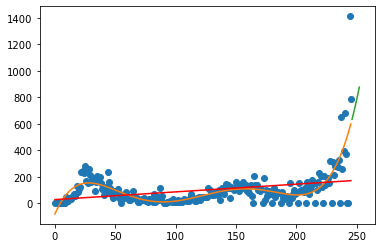

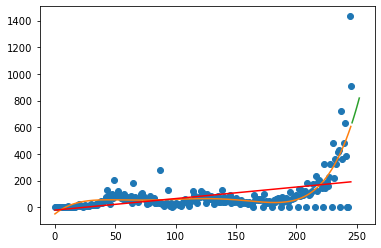

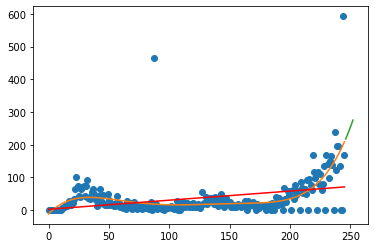

In [72]:
for i in range (top5_counties.index.size):
    Y = top5_counties.iloc[i].values.tolist()
    X_train= np.array(X)
    Y_train= np.array(Y)
    X_train = X_train[:, np.newaxis]
    Y_train= Y_train[:, np.newaxis]
    
    poly = PolynomialFeatures(degree = 5) 
    X_poly = poly.fit_transform(X_train) 
    poly.fit(X_poly, Y_train) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, Y_train) 
    y_hat = lin2.predict(poly.fit_transform(X_train))
    y_hat2 = lin2.predict(poly.fit_transform(K_test))
    
    Y_cases = top5_counties.iloc[i].values.tolist()
    Y = np.array(Y_cases)
    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)
    
    plt.figure()
    plt.plot(X_train.squeeze(), Y_train, 'o')
    plt.plot(X_train.squeeze(), y_hat);
    plt.plot(K_test.squeeze(), y_hat2)
    plt.plot(X,p(X),"r-")

### On all the graphs we can see the trend line in red along with the prediction path in orange. the green part of the curve represents the prediction for the next seven days. 

### Point of No Return 

In [73]:
#get the ICU beds column 
MI_counties_hos =hospital.loc[hospital['State'] == 'MI']
MI_state_hos = MI_counties_hos.groupby(['State']).sum()
total_ICU_bed = MI_state_hos['NUM_ICU_BEDS']
total_ICU_bed

State
MI    2602.0
Name: NUM_ICU_BEDS, dtype: float64

#### Through the non-linear model, the trend in daily new death was small with a relative number of about maximum 5 deaths per day. This value not close to the total number of  ICU bed in Michigan State which indicates that the state is doing well and there is no "point of no return". 

### Decision Tree 

In [74]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [75]:
Xcases_trainD = np.array(X)
Ycases_trainD = np.array(Y_cases)
K_test = np.array(K)
Xcases_trainD = Xcases_trainD[:, np.newaxis]
Ycases_trainD = Ycases_trainD[:, np.newaxis]
K_test = K_test[:, np.newaxis]

In [76]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

yhat_test = clf.predict(X_train)
yhat_test1 = clf.predict(K_test)

print("The RMSE: ",np.sqrt(metrics.mean_squared_error(Y_train, yhat_test)))
score = r2_score(Y_train, yhat_test)
print("R^2:",score)

The RMSE:  0.0
R^2: 1.0


Text(0.5, 1.0, 'Decision Tree MI-cases')

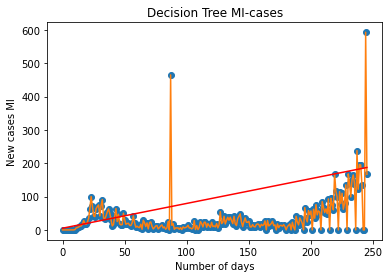

In [78]:
plt.figure()
plt.plot(X_train.squeeze(), Y_train, 'o')
plt.plot(X_train.squeeze(), yhat_test);

Y_cases = normalized_daily_new_cases_MI.iloc[0].values.tolist()
X = np.array(X)
Y = np.array(Y_cases)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)

plt.plot(X,p(X),"r-")
plt.xlabel('Number of days')
plt.ylabel('New cases MI')
plt.title('Decision Tree MI-cases')

### Decision Tree for deaths 

In [79]:
Y_deaths = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X_deaths_train = np.array(X)
Y_deaths_train = np.array(Y_deaths)
Kdeaths_test = np.array(K)

X_deaths_train = X_deaths_train[:, np.newaxis]
Y_deaths_train = Y_deaths_train[:, np.newaxis]
Kdeaths_test = Kdeaths_test[:, np.newaxis]

clf = DecisionTreeRegressor()
clf = clf.fit(X_deaths_train, Y_deaths_train)

yhat_test = clf.predict(X_deaths_train)
yhat_test1 = clf.predict(K_test)

print("The RMSE: ",np.sqrt(metrics.mean_squared_error(Y_deaths_train, yhat_test)))
score = r2_score(Y_deaths_train, yhat_test)
print("R^2:",score)


The RMSE:  0.0
R^2: 1.0


Text(0.5, 1.0, 'Decision Tree MI-deaths')

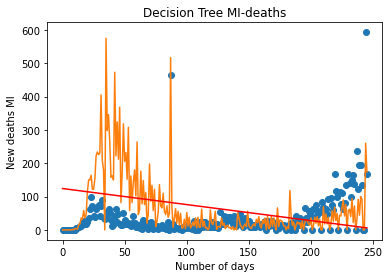

In [80]:
plt.figure()
plt.plot(X_train.squeeze(), Y_train, 'o')
plt.plot(X_train.squeeze(), yhat_test);

Y_cases = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X = np.array(X)
Y = np.array(Y_deaths)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)

plt.plot(X,p(X),"r-")

plt.xlabel('Number of days')
plt.ylabel('New deaths MI')
plt.title('Decision Tree MI-deaths')

#### The R^2 for both the number of cases and the number of deaths is 1 which indicates that the model performes well and the RMSE is small compare to the linear and polynomial model. From this analysis we can conclude that Decision Tree fits best our data. 

### Random Forest 

In [81]:
X_train= np.array(X)
Y_train= np.array(Y_cases)
X_train = X_train[:, np.newaxis]
Y_train= Y_train[:, np.newaxis]

model1 = RandomForestRegressor()
model1.fit(X_train, Y_train)

yhat_RF = model1.predict(X_train)
yhat_RF1 = model1.predict(K_test)

print("The RMSE:",np.sqrt(metrics.mean_squared_error(Y_train, yhat_RF)))
score1 = r2_score(Y_train, yhat_RF)
print("R^2: ", score1)

<ipython-input-81-9ad58de9c9eb>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, Y_train)


The RMSE: 29.05130837488534
R^2:  0.9011569754629839


Text(0.5, 1.0, 'Random Forest MI-cases')

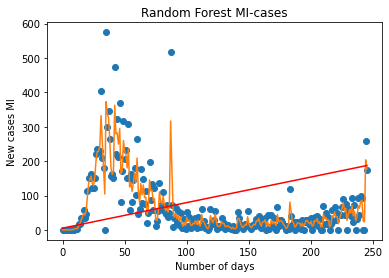

In [82]:
plt.figure()
plt.plot(X_train.squeeze(), Y_train, 'o')
plt.plot(X_train.squeeze(), yhat_RF);

Y_cases = normalized_daily_new_cases_MI.iloc[0].values.tolist()
X = np.array(X)
Y = np.array(Y_cases)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)

plt.plot(X,p(X),"r-")

plt.xlabel('Number of days')
plt.ylabel('New cases MI')
plt.title('Random Forest MI-cases')

#### Random forest for the number of deaths 

In [83]:
Y_deaths = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X_deaths_train = np.array(X)
Y_deaths_train = np.array(Y_deaths)
Kdeaths_test = np.array(K)

X_deaths_train = X_deaths_train[:, np.newaxis]
Y_deaths_train = Y_deaths_train[:, np.newaxis]
Kdeaths_test = Kdeaths_test[:, np.newaxis]


model1 = RandomForestRegressor()
model1.fit(X_deaths_train, Y_deaths_train)

yhat_RF = model1.predict(X_deaths_train)
yhat_RF1 = model1.predict(Kdeaths_test)

print("The RMSE:",np.sqrt(metrics.mean_squared_error(Y_deaths_train, yhat_RF)))
score1 = r2_score(Y_deaths_train, yhat_RF)
print("R^2: ", score1)

<ipython-input-83-390d6dfec52c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_deaths_train, Y_deaths_train)


The RMSE: 28.871149495140155
R^2:  0.9023791051348686


Text(0.5, 1.0, 'Random Forest MI-deaths')

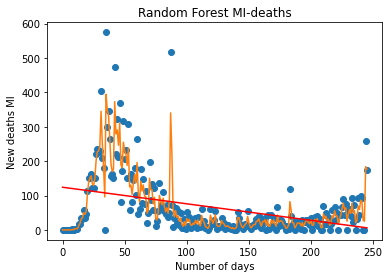

In [84]:
plt.figure()
plt.plot(X_train.squeeze(), Y_train, 'o')
plt.plot(X_train.squeeze(), yhat_RF);

Y_cases = normalized_daily_new_deaths_MI.iloc[0].values.tolist()
X = np.array(X)
Y = np.array(Y_deaths)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r-")

plt.xlabel('Number of days')
plt.ylabel('New deaths MI')
plt.title('Random Forest MI-deaths')

### Arima

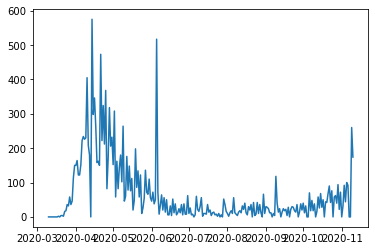

In [85]:
plt.plot(X_cases, Y_cases)

##### Our data seems stationary because the number of daily new cases and deaths that are being used . Moreover, from the graph above we can see that there is no trend: it is neither increasing or decreasing over time. Therefore ARIMA model can be applied to the data.

In [86]:
from statsmodels.tsa.arima_model import ARIMA 
Xcases_trainD = np.array(X)
Xcases_trainD = Xcases_trainD[:, np.newaxis]
Ycases_trainD = np.array(Y_cases)
Y_cases = pd.DataFrame(normalized_daily_new_cases_MI.iloc[0]) 
Ycases_trainD = np.array(Y_cases)

xtraining, xtest = Xcases_trainD[:196,:], Xcases_trainD[196:,:]
ytraining, ytest = Ycases_trainD[:196,:], Ycases_trainD[196:,:]

arima_model= ARIMA(ytraining, order=(3,1,1))
ari= arima_model.fit()
prediction= ari.forecast(steps=50)[0]
print("The predicted values for cases:", prediction)

/opt/anaconda3/envs/opencv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The predicted values for cases: [78.41279813 85.24996462 77.87771738 82.02342278 81.91850022 82.72722945
 82.92405692 83.35414957 83.72779136 84.13429755 84.52799717 84.92509377
 85.32040917 85.71642834 86.11224684 86.50816259 86.90403962 87.29992834
 87.69581172 88.09169724 88.48758208 88.88346721 89.27935223 89.67523728
 90.07112232 90.46700737 90.86289241 91.25877746 91.6546625  92.05054754
 92.44643259 92.84231763 93.23820268 93.63408772 94.02997277 94.42585781
 94.82174285 95.2176279  95.61351294 96.00939799 96.40528303 96.80116808
 97.19705312 97.59293816 97.98882321 98.38470825 98.7805933  99.17647834
 99.57236339 99.96824843]


/opt/anaconda3/envs/opencv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'ARIMA MI-cases')

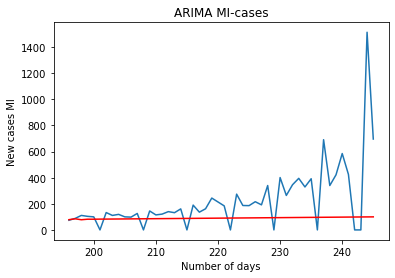

In [88]:
pred= [i for i in range(196,246)]
plt.plot(xtest, ytest)
plt.plot(pred, prediction, "red")

plt.xlabel('Number of days')
plt.ylabel('New cases MI')
plt.title('ARIMA MI-cases')

In [89]:
print("The RMSE:", np.sqrt(metrics.mean_squared_error(ytest, prediction)))
score = r2_score(ytest, prediction)
print("The R^2:", score)

The RMSE: 280.3618737750299
The R^2: -0.273849141616582


#### ARIMA for number of deaths 

In [90]:
from statsmodels.tsa.arima_model import ARIMA 
Xcases_trainD = np.array(X)
Xcases_trainD = Xcases_trainD[:, np.newaxis]
Y_death = pd.DataFrame(normalized_daily_new_deaths_MI.iloc[0]) 
Ycases_trainD = np.array(Y_death)
xtraining, xtest = Xcases_trainD[:196,:], Xcases_trainD[196:,:]
ytraining, ytest = Ycases_trainD[:196,:], Ycases_trainD[196:,:]

arima_model= ARIMA(ytraining, order=(0,1,1))
ari= arima_model.fit()
prediction= ari.forecast(steps=50)[0]
print("The predicted values for deaths:", prediction)

The predicted values for deaths: [17.23046203 17.3080283  17.38559458 17.46316085 17.54072712 17.61829339
 17.69585966 17.77342594 17.85099221 17.92855848 18.00612475 18.08369102
 18.1612573  18.23882357 18.31638984 18.39395611 18.47152238 18.54908866
 18.62665493 18.7042212  18.78178747 18.85935374 18.93692002 19.01448629
 19.09205256 19.16961883 19.2471851  19.32475138 19.40231765 19.47988392
 19.55745019 19.63501646 19.71258274 19.79014901 19.86771528 19.94528155
 20.02284782 20.1004141  20.17798037 20.25554664 20.33311291 20.41067918
 20.48824546 20.56581173 20.643378   20.72094427 20.79851054 20.87607682
 20.95364309 21.03120936]


/opt/anaconda3/envs/opencv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'ARIMA MI-deaths')

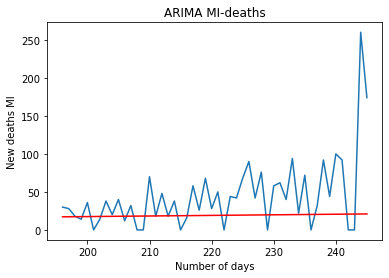

In [91]:
pred= [i for i in range(196,246)]
plt.plot(xtest, ytest)
plt.plot(pred, prediction, "red")

plt.xlabel('Number of days')
plt.ylabel('New deaths MI')
plt.title('ARIMA MI-deaths')

In [92]:
print("The RMSE:", np.sqrt(metrics.mean_squared_error(ytest, prediction)))
score = r2_score(ytest, prediction)
print("The R^2:", score)

The RMSE: 52.089473017361485
The R^2: -0.2807772099643209


#### For the Arima model, the R score is negative for both the number of cases and the number of deaths which means the model is doing worse that the average number of cases. This observation can be reliable because ARIMA model focuses on the moving average of the data, so R^2 is not the metric that matters the most in these cases.

### Enrichment dataset 

#### From my enrichment dataset, there were 4 variables that were significant for my analysis so I am using all of the variables to study the spread of Covid in cases and deaths. To do so, I basically tried to observe the relationship between each variable and the total number of new cases/deaths  on the last day. If there is a relationship then it means that this variable contributes to the spread of the virus. 

In [93]:
employment.head()

,Unnamed: 0,Unnamed: 0.1,countyFIPS,County Name,State,population,County Name_x,stateFIPS,1/22/20_x,1/23/20_x,...,9/9/20_y,9/10/20_y,9/11/20_y,9/12/20_y,9/13/20_y,9/14/20_y,Establishment Count,January Employment,February Employment,March Employment
0,0,0,0,Statewide Unallocated,AL,0,Statewide Unallocated,1,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,1,1,1001,Autauga County,AL,55869,Autauga County,1,0,0,...,24,24,24,24,24,24,3518.0,39214.0,38998.0,39084.0
2,2,2,1003,Baldwin County,AL,223234,Baldwin County,1,0,0,...,46,46,47,47,47,47,26290.0,276106.0,281074.0,283714.0
3,3,3,1005,Barbour County,AL,24686,Barbour County,1,0,0,...,7,7,7,7,7,7,2156.0,30146.0,30272.0,30314.0
4,4,4,1007,Bibb County,AL,22394,Bibb County,1,0,0,...,9,9,9,9,9,9,1376.0,16552.0,16601.0,16763.0


In [94]:
group_by_States = employment.groupby(['State']).sum()
group_by_States
states_empc= (group_by_States.loc[:, group_by_States.columns.str.endswith("_x")])
states_empd= (group_by_States.loc[:, group_by_States.columns.str.endswith("_y")])

newcases_MI_emp = states_empc.diff(axis=1)
newcases_MI_emp=newcases_MI_emp.loc[: ,'3/6/20_x':]
newcases_MI_emp.columns = newcases_MI_emp.columns.str.replace('_x', '')
newcases_MI_emp

newdeaths_MI_emp = states_empd.diff(axis=1)
newdeaths_MI_emp=newdeaths_MI_emp.loc[: ,'3/6/20_y':]
newdeaths_MI_emp.columns = newdeaths_MI_emp.columns.str.replace('_y', '')
newdeaths_MI_emp

stateCases = newcases_MI_emp[20:30:]
stateDeaths= newdeaths_MI_emp[20:30:]
stateDeaths

,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
State,,,,,,,,,,,,,,,,,,,,,
MD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,6.0,3.0,4.0,3.0,10.0,5.0,8.0,5.0,1.0
ME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,5.0,3.0,61.0,22.0,7.0,11.0,0.0,10.0
MN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,3.0,2.0,7.0,15.0,13.0,9.0,13.0,3.0
MO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77.0,20.0,1.0,2.0,11.0,19.0,10.0,3.0,1.0,9.0
MS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,16.0,1.0,0.0,35.0,29.0,13.0,15.0,15.0,15.0
MT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,3.0,1.0,8.0,2.0,2.0,3.0
NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,1.0,7.0,13.0,48.0,33.0,33.0,24.0,5.0,8.0
ND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,0.0,1.0,3.0,4.0,3.0,1.0,2.0


In [95]:
emp_level= group_by_States[["Establishment Count","January Employment","February Employment", "March Employment"]]
empState= emp_level[20:30]
result_cases = pd.concat([stateCases,empState], axis=1)
some= result_cases.loc[:, '9/14/20':]
some= some.rename(columns={'9/14/20': 'last','Establishment Count': 'Count','January Employment':'Jan','February Employment': 'Feb',
                          'March Employment': 'March'})
some


,last,Count,Jan,Feb,March
State,,,,,
MD,536.0,604236.0,9373543.0,9380393.0,9326662.0
ME,15.0,187040.0,2145637.0,2139873.0,2127589.0
MI,1255.0,929382.0,15508294.0,15558526.0,15474213.0
MN,639.0,618676.0,10433423.0,10413994.0,10330032.0
MO,1341.0,753592.0,9963644.0,9984840.0,9978548.0
MS,153.0,246274.0,3887236.0,3898779.0,3878950.0
MT,86.0,181098.0,1642617.0,1646209.0,1646437.0
NC,845.0,1092024.0,15968455.0,16032975.0,15980716.0
ND,256.0,122000.0,1486537.0,1487191.0,1482210.0


In [96]:
lm = smf.ols(formula='last ~ Count + Jan + Feb ', data=some).fit()

lm1 = smf.ols(formula='last ~ Count + Jan + Feb +March ', data=some).fit()
# print the coefficients
#print(lm.params)
#print(lm1.params)
print("The p-values are:", "\n",lm1.pvalues)
#model performance

print(lm1.rsquared)
lm1.conf_int()

The p-values are: 
 Intercept    0.327432
Count        0.054413
Jan          0.040547
Feb          0.018370
March        0.018533
dtype: float64
0.9171007841967583


,0,1
Intercept,-208.957959,514.197526
Count,-0.014927,0.000204
Jan,0.000893,0.027199
Feb,-0.078130,-0.011338
March,0.007903,0.054900


In [97]:
lm.summary()

/opt/anaconda3/envs/opencv/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   last   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.180
Date:                Sun, 15 Nov 2020   Prob (F-statistic):             0.0420
Time:                        21:31:54   Log-Likelihood:                -68.765
No. Observations:                  10   AIC:                             145.5
Df Residuals:                       6   BIC:                             146.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.2177    212.014     -0.270      0.796    -575.997     461.562
Count          0.0018      0.002      0.875      0.415      -0.003       0.007
Jan            0.0020      0.006      0.314      0.764      -0.013       0.017
Feb           -0.0020      0.006     -0.318      0.761      -0.017       0.013
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.459
Skew:                           0.302   Prob(JB):                        0.795
Kurtosis:                       2.142   Cond. No.                     2.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Count: 0.054413,  Jan: 0.040547, Feb: 0.018370 ,  March: 0.018533
#### The p-values for all the variables from the enrichment dataset are less than 0.05 which indicates that there is a relationship between the employment level and the the number of covid19 cases. This is a confirmation as in stage II we have calculated the correlation coefficient and they were really high(more than 0.9). Therefore all these variables are strongly correlated to the number of covid19 cases. They contribute to the spread of the virus 

In [98]:
emp_level= group_by_States[["Establishment Count","January Employment","February Employment", "March Employment"]]
empState= emp_level[20:30]
result_deaths = pd.concat([stateDeaths,empState], axis=1)
some1= result_deaths.loc[:, '9/14/20':]
some1= some1.rename(columns={'9/14/20': 'last','Establishment Count': 'Count','January Employment':'Jan','February Employment': 'Feb',
                          'March Employment': 'March'})
some1



,last,Count,Jan,Feb,March
State,,,,,
MD,1.0,604236.0,9373543.0,9380393.0,9326662.0
ME,0.0,187040.0,2145637.0,2139873.0,2127589.0
MI,10.0,929382.0,15508294.0,15558526.0,15474213.0
MN,3.0,618676.0,10433423.0,10413994.0,10330032.0
MO,9.0,753592.0,9963644.0,9984840.0,9978548.0
MS,15.0,246274.0,3887236.0,3898779.0,3878950.0
MT,3.0,181098.0,1642617.0,1646209.0,1646437.0
NC,8.0,1092024.0,15968455.0,16032975.0,15980716.0
ND,2.0,122000.0,1486537.0,1487191.0,1482210.0


In [99]:
lm = smf.ols(formula='last ~ Count + Jan + Feb +March ', data=some1).fit()
# print the coefficients
print("The p-values are:", "\n",lm.pvalues)
#model performance

print(lm.rsquared)
lm.conf_int()

The p-values are: 
 Intercept    0.166913
Count        0.345552
Jan          0.777916
Feb          0.640171
March        0.409978
dtype: float64
0.42940922874842435


,0,1
Intercept,-3.746681,16.442256
Count,-0.000297,0.000126
Jan,-0.000410,0.000325
Feb,-0.001113,0.000752
March,-0.000427,0.000885


In [100]:
lm.summary()

/opt/anaconda3/envs/opencv/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   last   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.9407
Date:                Sun, 15 Nov 2020   Prob (F-statistic):              0.510
Time:                        21:31:57   Log-Likelihood:                -26.920
No. Observations:                  10   AIC:                             63.84
Df Residuals:                       5   BIC:                             65.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3478      3.927      1.616      0.167      -3.747      16.442
Count      -8.554e-05   8.22e-05     -1.041      0.346      -0.000       0.000
Jan        -4.252e-05      0.000     -0.298      0.778      -0.000       0.000
Feb           -0.0002      0.000     -0.497      0.640      -0.001       0.001
March          0.0002      0.000      0.899      0.410      -0.000       0.001
==============================================================================
Omnibus:                        4.315   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                1.374
Skew:                           0.855   Prob(JB):                        0.503
Kurtosis:                       3.613   Cond. No.                     3.88e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### For the number of deaths, the p-values are all greater than 0.05 and this indicates that there is no significant relationship between the number of deaths and the employment dataset variables. That is because the number of deaths relies more on the number of covid cases so it is fair enough not to find a remarkable result.

### Overall analysis: 
From the analysis of all the models, Decision Tree seems to be the model that fits the data best. For both number of cases and number of deaths, the R^2 was 1 and the RMSE was relatively low compare to the other models. This result indicates that the model is doing good; the predictions can be said to be accurate. Random Forest Model is the second top model that works for the data with a R^2 value of 0.90. The Linear and polynomial model outperformed the ARIMA model.The reason why the R^2 value for the ARIMA model was the smallest is because ARIMA model focuses more on the moving average of the data so the R^2 metrics is not really of a big importance in this case.
From stage II, we have already seen that there was a strong correlation between the employment level and the number of Covid cases. By modeling a multiple linear regression, the p-values were analyzed and check if the values are less than 0.05 that indicates that there is a relationship between the variables and the number of cases and deaths and so those variables contribute to the spread of the virus. From this study, it confirmed the result from stage II as the p-values were less than 0.05 so the confidence interval doesn’t include zero. All values in the confidence interval are plausible values for the parameter. 
